In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

from tensorflow import keras

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Epoch 1/25
60/60 [==============================] - 1s 9ms/step - loss: 0.0811 - accuracy: 0.0934 - val_loss: 0.0487 - val_accuracy: 0.1632
Epoch 2/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0424 - accuracy: 0.1803 - val_loss: 0.0310 - val_accuracy: 0.2129
Epoch 3/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0302 - accuracy: 0.2122 - val_loss: 0.0216 - val_accuracy: 0.2379
Epoch 4/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.2302 - val_loss: 0.0176 - val_accuracy: 0.2529
Epoch 5/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0216 - accuracy: 0.2406 - val_loss: 0.0151 - val_accuracy: 0.2584
Epoch 6/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.2476 - val_loss: 0.0137 - val_accuracy: 0.2653
Epoch 7/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0188 - accuracy: 0.2531 - val_loss: 0.0125 - val_accuracy: 0.2714
Epoch 8/25
60/60 [==

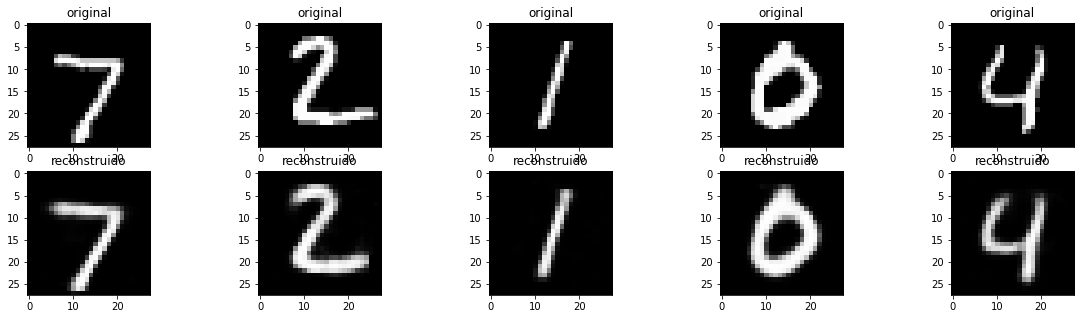

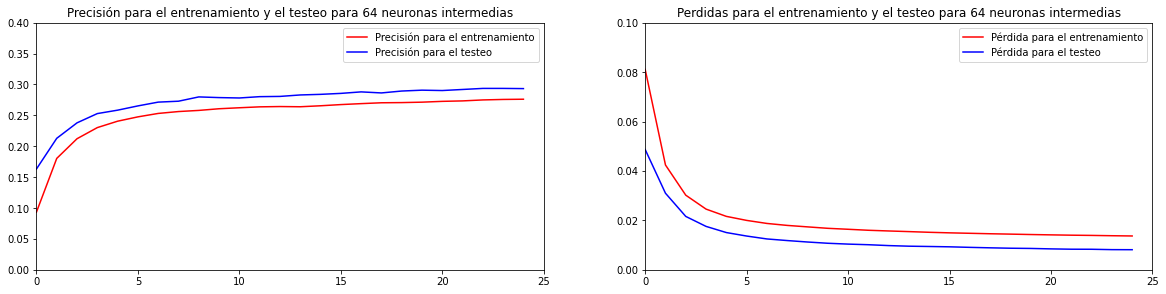

In [ ]:
latent_dim_1 = 512
latent_dim_2 = 64

class Autoencoder(Model):
  def __init__(self, latent_dim_1,latent_dim_2):
    super(Autoencoder, self).__init__()
    self.latent_dim_1 = latent_dim_1   
    self.latent_dim_2 = latent_dim_2   

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(latent_dim_2, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim_1,latent_dim_2) 

#optimizer = tf.keras.optimizers.SGD(lr=1e-8)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])
history = autoencoder.fit(x_train, x_train,
                          batch_size=1000,
                          epochs=25,
                          shuffle=True,
                          validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  #original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

  #reconstruido
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstruido")
  plt.gray()
  
plt.figure(figsize=(20, 10))

acc1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']
epochs1 = range(len(acc1))

plt.subplot(2,2,1)
plt.plot(epochs1, acc1, 'r', label='Precisión para el entrenamiento')
plt.plot(epochs1, val_acc1, 'b', label='Precisión para el testeo')
plt.title('Precisión para el entrenamiento y el testeo para 64 neuronas intermedias')
plt.ylim(0, 0.4)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.plot(epochs1, loss1, 'r', label='Pérdida para el entrenamiento')
plt.plot(epochs1, val_loss1, 'b', label='Pérdida para el testeo')
plt.title('Perdidas para el entrenamiento y el testeo para 64 neuronas intermedias')
plt.ylim(0, 0.1)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.show()

Epoch 1/25
60/60 [==============================] - 1s 9ms/step - loss: 0.0809 - accuracy: 0.0958 - val_loss: 0.0479 - val_accuracy: 0.1638
Epoch 2/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.1811 - val_loss: 0.0285 - val_accuracy: 0.2148
Epoch 3/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 0.2173 - val_loss: 0.0189 - val_accuracy: 0.2393
Epoch 4/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0215 - accuracy: 0.2361 - val_loss: 0.0152 - val_accuracy: 0.2568
Epoch 5/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0188 - accuracy: 0.2472 - val_loss: 0.0130 - val_accuracy: 0.2640
Epoch 6/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0172 - accuracy: 0.2546 - val_loss: 0.0117 - val_accuracy: 0.2704
Epoch 7/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0161 - accuracy: 0.2608 - val_loss: 0.0106 - val_accuracy: 0.2775
Epoch 8/25
60/60 [==

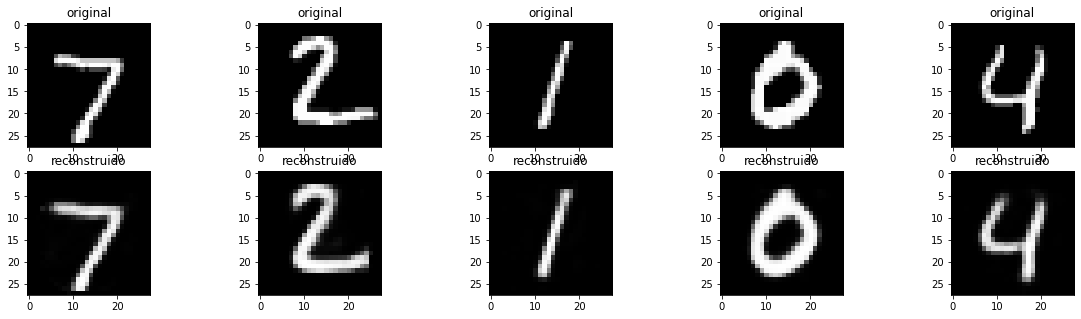

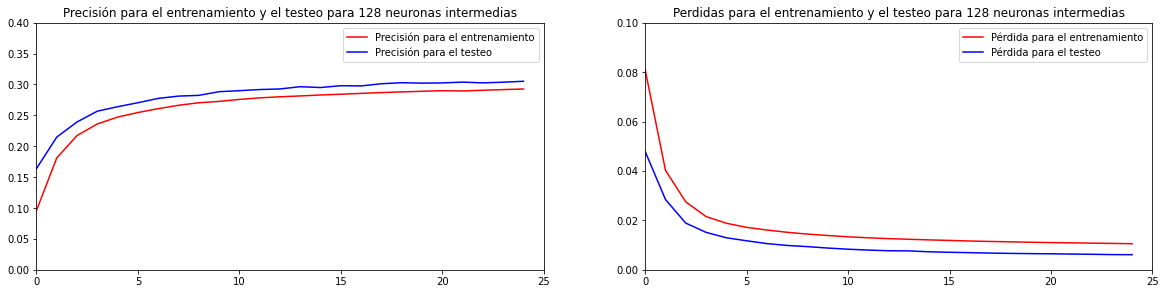

In [ ]:
latent_dim_1 = 512
latent_dim_2 = 128

class Autoencoder(Model):
  def __init__(self, latent_dim_1,latent_dim_2):
    super(Autoencoder, self).__init__()
    self.latent_dim_1 = latent_dim_1   
    self.latent_dim_2 = latent_dim_2   

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(latent_dim_2, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim_1,latent_dim_2) 

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])
history = autoencoder.fit(x_train, x_train,
                          batch_size=1000,
                          epochs=25,
                          shuffle=True,
                          validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  #original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

  #reconstruido
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstruido")
  plt.gray()
  
plt.figure(figsize=(20, 10))

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']
epochs2 = range(len(acc2))

plt.subplot(2,2,1)
plt.plot(epochs2, acc2, 'r', label='Precisión para el entrenamiento')
plt.plot(epochs2, val_acc2, 'b', label='Precisión para el testeo')
plt.title('Precisión para el entrenamiento y el testeo para 128 neuronas intermedias')
plt.ylim(0, 0.4)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.plot(epochs2, loss2, 'r', label='Pérdida para el entrenamiento')
plt.plot(epochs2, val_loss2, 'b', label='Pérdida para el testeo')
plt.title('Perdidas para el entrenamiento y el testeo para 128 neuronas intermedias')
plt.ylim(0, 0.1)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.show()

Epoch 1/25
60/60 [==============================] - 1s 10ms/step - loss: 0.0772 - accuracy: 0.0994 - val_loss: 0.0461 - val_accuracy: 0.1625
Epoch 2/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.1873 - val_loss: 0.0272 - val_accuracy: 0.2241
Epoch 3/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.2248 - val_loss: 0.0198 - val_accuracy: 0.2467
Epoch 4/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.2421 - val_loss: 0.0162 - val_accuracy: 0.2582
Epoch 5/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.2516 - val_loss: 0.0140 - val_accuracy: 0.2666
Epoch 6/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0175 - accuracy: 0.2588 - val_loss: 0.0124 - val_accuracy: 0.2717
Epoch 7/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0163 - accuracy: 0.2643 - val_loss: 0.0117 - val_accuracy: 0.2781
Epoch 8/25
60/60 [=

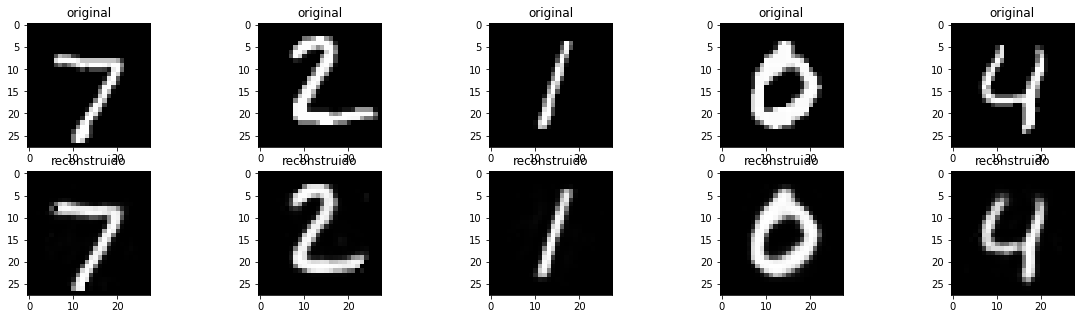

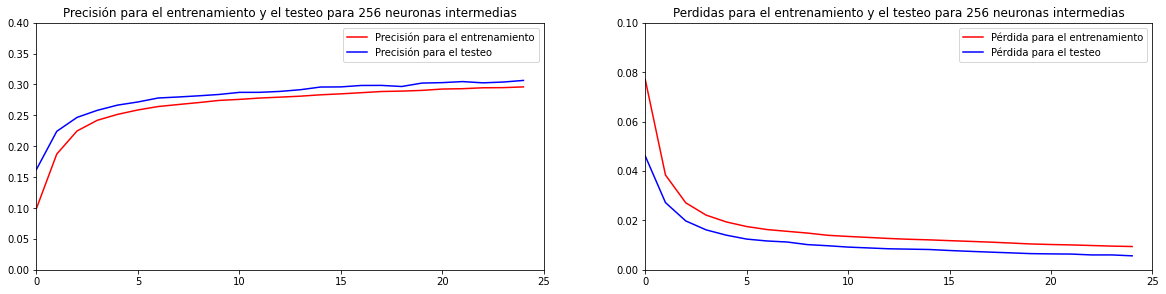

In [ ]:
latent_dim_1 = 512
latent_dim_2 = 256

class Autoencoder(Model):
  def __init__(self, latent_dim_1,latent_dim_2):
    super(Autoencoder, self).__init__()
    self.latent_dim_1 = latent_dim_1   
    self.latent_dim_2 = latent_dim_2   

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(latent_dim_2, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim_1,latent_dim_2) 

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])
history = autoencoder.fit(x_train, x_train,
                          batch_size=1000,
                          epochs=25,
                          shuffle=True,
                          validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  #original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

  #reconstruido
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstruido")
  plt.gray()
  
plt.figure(figsize=(20, 10))

acc3 = history.history['accuracy']
val_acc3 = history.history['val_accuracy']
loss3 = history.history['loss']
val_loss3 = history.history['val_loss']
epochs3 = range(len(acc3))

plt.subplot(2,2,1)
plt.plot(epochs3, acc3, 'r', label='Precisión para el entrenamiento')
plt.plot(epochs3, val_acc3, 'b', label='Precisión para el testeo')
plt.title('Precisión para el entrenamiento y el testeo para 256 neuronas intermedias')
plt.ylim(0, 0.4)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.plot(epochs3, loss3, 'r', label='Pérdida para el entrenamiento')
plt.plot(epochs3, val_loss3, 'b', label='Pérdida para el testeo')
plt.title('Perdidas para el entrenamiento y el testeo para 256 neuronas intermedias')
plt.ylim(0, 0.1)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.show()

Epoch 1/25
60/60 [==============================] - 1s 9ms/step - loss: 0.0679 - accuracy: 0.1512 - val_loss: 0.0360 - val_accuracy: 0.2207
Epoch 2/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.2531 - val_loss: 0.0216 - val_accuracy: 0.2724
Epoch 3/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.2876 - val_loss: 0.0147 - val_accuracy: 0.2922
Epoch 4/25
60/60 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 0.3049 - val_loss: 0.0108 - val_accuracy: 0.3044
Epoch 5/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.3162 - val_loss: 0.0085 - val_accuracy: 0.3134
Epoch 6/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.3232 - val_loss: 0.0070 - val_accuracy: 0.3192
Epoch 7/25
60/60 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.3291 - val_loss: 0.0060 - val_accuracy: 0.3234
Epoch 8/25
60/60 [==

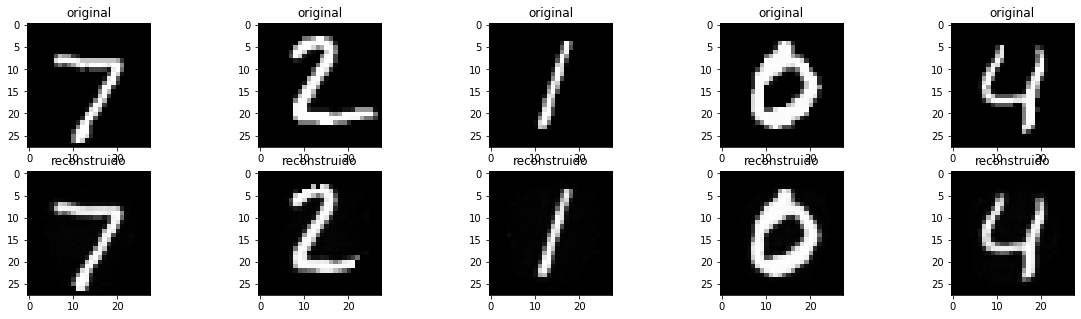

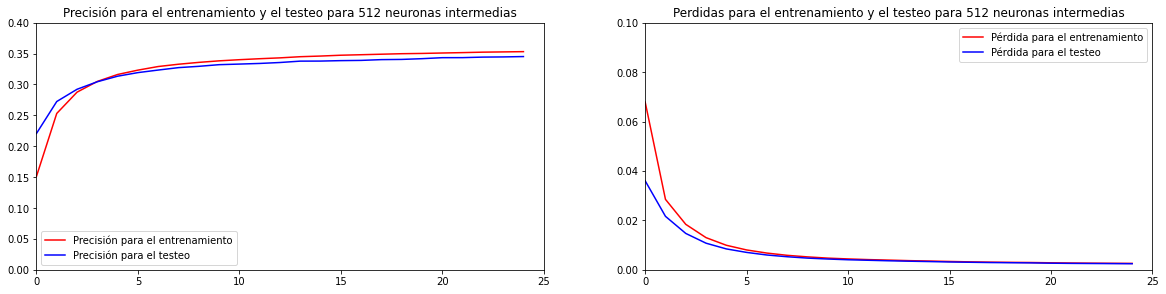

In [ ]:
latent_dim_1 = 512

class Autoencoder(Model):
  def __init__(self, latent_dim_1):
    super(Autoencoder, self).__init__()
    self.latent_dim_1 = latent_dim_1    

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
#      layers.Dropout(.1),
      layers.Dense(latent_dim_1, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim_1) 

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])
history = autoencoder.fit(x_train, x_train,
                          batch_size=1000,
                          epochs=25,
                          shuffle=True,
                          validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  #original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

  #reconstruido
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstruido")
  plt.gray()
  
plt.figure(figsize=(20, 10))

acc4 = history.history['accuracy']
val_acc4 = history.history['val_accuracy']
loss4 = history.history['loss']
val_loss4 = history.history['val_loss']
epochs4 = range(len(acc4))

plt.subplot(2,2,1)
plt.plot(epochs4, acc4, 'r', label='Precisión para el entrenamiento')
plt.plot(epochs4, val_acc4, 'b', label='Precisión para el testeo')
plt.title('Precisión para el entrenamiento y el testeo para 512 neuronas intermedias')
plt.ylim(0, 0.4)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.plot(epochs4, loss4, 'r', label='Pérdida para el entrenamiento')
plt.plot(epochs4, val_loss4, 'b', label='Pérdida para el testeo')
plt.title('Perdidas para el entrenamiento y el testeo para 512 neuronas intermedias')
plt.ylim(0, 0.1)
plt.xlim(0, 25)
plt.legend(loc=0)

plt.show()

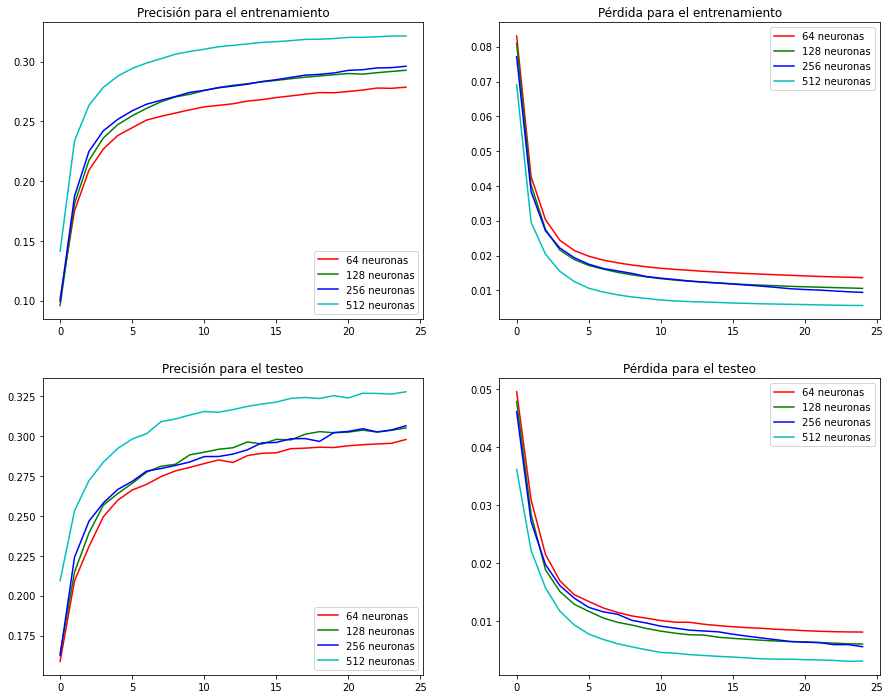

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(epochs1, acc1, 'r', label='64 neuronas')
plt.plot(epochs2, acc2, 'g', label='128 neuronas')
plt.plot(epochs3, acc3, 'b', label='256 neuronas')
plt.plot(epochs4, acc4, 'c', label='512 neuronas')
plt.title('Precisión para el entrenamiento')
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.plot(epochs1, loss1, 'r', label='64 neuronas')
plt.plot(epochs2, loss2, 'g', label='128 neuronas')
plt.plot(epochs3, loss3, 'b', label='256 neuronas')
plt.plot(epochs4, loss4, 'c', label='512 neuronas')
plt.title('Pérdida para el entrenamiento')
plt.legend(loc=0)

plt.subplot(2,2,3)
plt.plot(epochs1, val_acc1, 'r', label='64 neuronas')
plt.plot(epochs2, val_acc2, 'g', label='128 neuronas')
plt.plot(epochs3, val_acc3, 'b', label='256 neuronas')
plt.plot(epochs4, val_acc4, 'c', label='512 neuronas')
plt.title('Precisión para el testeo')
plt.legend(loc=0)

plt.subplot(2,2,4)
plt.plot(epochs1, val_loss1, 'r', label='64 neuronas')
plt.plot(epochs2, val_loss2, 'g', label='128 neuronas')
plt.plot(epochs3, val_loss3, 'b', label='256 neuronas')
plt.plot(epochs4, val_loss4, 'c', label='512 neuronas')
plt.title('Pérdida para el testeo')
plt.legend(loc=0)

plt.show()